# RNN "Many-2-Many" use-case. 

## Run sequences based on words.

### Dataset layout

#### Window 0:

```python
Sample: "Hello,world and ML"
Label: "world and ML"
```

#### Window 1:
```python
Sample: "world and ML"
Label: "and ML"
```

......


In [33]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU, Conv1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential

import numpy as np 
import pprint as pp


# Load and clean data

In [34]:

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data = data.replace("\n", "")
print(data)

In the town of Athy one Jeremy Lanigan  Battered away til he hadnt a pound. His father died and made him a man again  Left him a farm and ten acres of ground. He gave a grand party for friends and relations Who didnt forget him when come to the wall, And if youll but listen Ill make your eyes glisten Of the rows and the ructions of Lanigans Ball. Myself to be sure got free invitation, For all the nice girls and boys I might ask, And just in a minute both friends and relations Were dancing round merry as bees round a cask. Judy ODaly, that nice little milliner, She tipped me a wink for to give her a call, And I soon arrived with Peggy McGilligan Just in time for Lanigans Ball. There were lashings of punch and wine for the ladies, Potatoes and cakes; there was bacon and tea, There were the Nolans, Dolans, OGradys Courting the girls and dancing away. Songs they went round as plenty as water, The harp that once sounded in Taras old hall,Sweet Nelly Gray and The Rat Catchers Daughter,All si

## Convert to corpus

In [35]:
corpus=[data]
print(corpus)


['In the town of Athy one Jeremy Lanigan  Battered away til he hadnt a pound. His father died and made him a man again  Left him a farm and ten acres of ground. He gave a grand party for friends and relations Who didnt forget him when come to the wall, And if youll but listen Ill make your eyes glisten Of the rows and the ructions of Lanigans Ball. Myself to be sure got free invitation, For all the nice girls and boys I might ask, And just in a minute both friends and relations Were dancing round merry as bees round a cask. Judy ODaly, that nice little milliner, She tipped me a wink for to give her a call, And I soon arrived with Peggy McGilligan Just in time for Lanigans Ball. There were lashings of punch and wine for the ladies, Potatoes and cakes; there was bacon and tea, There were the Nolans, Dolans, OGradys Courting the girls and dancing away. Songs they went round as plenty as water, The harp that once sounded in Taras old hall,Sweet Nelly Gray and The Rat Catchers Daughter,All 

# Create Tokenizer and sequences

## Tokenizer

In [36]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


print(total_words) 
print(tokenizer.word_index)


263
{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'gra

### Sequences

In [37]:
input_sequences = tokenizer.texts_to_sequences(corpus)
input_sequences = input_sequences[0]
print(input_sequences)


[4, 2, 66, 8, 67, 68, 69, 70, 71, 40, 20, 21, 72, 3, 73, 16, 74, 75, 1, 76, 33, 3, 77, 22, 41, 33, 3, 78, 1, 79, 80, 8, 81, 21, 82, 3, 83, 84, 7, 42, 1, 43, 85, 86, 87, 33, 44, 88, 13, 2, 45, 1, 89, 90, 91, 92, 93, 94, 95, 96, 97, 8, 2, 98, 1, 2, 99, 8, 9, 10, 46, 13, 100, 101, 23, 102, 103, 7, 5, 2, 47, 17, 1, 24, 6, 104, 105, 1, 48, 4, 3, 106, 107, 42, 1, 43, 11, 49, 25, 50, 18, 108, 25, 3, 109, 110, 111, 26, 47, 112, 113, 14, 51, 52, 3, 114, 7, 13, 115, 27, 3, 116, 1, 6, 53, 117, 118, 119, 120, 48, 4, 54, 7, 9, 10, 28, 11, 121, 8, 122, 1, 123, 7, 2, 124, 125, 1, 126, 28, 34, 127, 1, 128, 28, 11, 2, 129, 130, 131, 132, 2, 17, 1, 49, 40, 133, 19, 134, 25, 18, 135, 18, 136, 2, 137, 26, 138, 139, 4, 140, 55, 141, 142, 143, 144, 1, 2, 145, 146, 147, 5, 148, 149, 12, 9, 10, 19, 11, 150, 5, 151, 8, 152, 153, 5, 25, 2, 154, 4, 3, 155, 156, 1, 6, 157, 158, 56, 159, 1, 51, 57, 2, 160, 8, 3, 161, 1, 3, 162, 163, 164, 165, 2, 17, 23, 5, 166, 12, 52, 58, 20, 167, 168, 2, 169, 170, 171, 7, 6, 35,

# Create dataset

In [38]:
window_size = 11
batch_size = 1 
 
input_sequences = tf.expand_dims(input_sequences, axis=-1 )
dataset = tf.data.Dataset.from_tensor_slices(input_sequences)
dataset = dataset.window(window_size, 1, 1, True)
dataset = dataset.flat_map(lambda window: window.batch(window_size).map(lambda x: (x[:-1], x[1:])))
dataset = dataset.batch(batch_size, drop_remainder=True)
 
for item in dataset.take(2):
  print(item) 
  print() 


(<tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[ 4],
        [ 2],
        [66],
        [ 8],
        [67],
        [68],
        [69],
        [70],
        [71],
        [40]]], dtype=int32)>, <tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[ 2],
        [66],
        [ 8],
        [67],
        [68],
        [69],
        [70],
        [71],
        [40],
        [20]]], dtype=int32)>)

(<tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[ 2],
        [66],
        [ 8],
        [67],
        [68],
        [69],
        [70],
        [71],
        [40],
        [20]]], dtype=int32)>, <tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[66],
        [ 8],
        [67],
        [68],
        [69],
        [70],
        [71],
        [40],
        [20],
        [21]]], dtype=int32)>)



# Machine-learning

## Hyperparemeter and callbacks

In [39]:
epochs = 150
units = 64
embeding_dim = 225


In [40]:
class StopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.reset_states()
    #if float(logs.get('loss')) < 0.38:
      #print("\n[mae={}, loss={}]".format(logs.get('mae'), logs.get('loss')))
      #self.model.stop_training = True
stopCallback = StopCallback()


In [41]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="loss", mode="min")


## Define model and graphic output

In [42]:
def plot(history):
  import matplotlib.pyplot as plt
  
  acc = history.history['accuracy']
  loss = history.history['loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.title('Training accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.title('Training loss')
  plt.legend()

  plt.show()


In [43]:
def build_model(*layers):
  tf.keras.backend.clear_session()
  tf.random.set_seed(51)
  np.random.seed(51)

  model = Sequential()
  model.add(Embedding(total_words, embeding_dim, input_length=window_size - 1,  batch_input_shape=[1, None]))# -1, cause the last element from origin is a label.
  [model.add(layer) for layer in layers]
  model.add(Dense(total_words / 2, 
                  activation=tf.keras.activations.relu,
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)))
  model.add(Dense(total_words, activation=tf.keras.activations.softmax))
  
  # Use SparseCategoricalCrossentropy, cause we are not using one-hot based label
  # https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])
  print(model.summary())
  
  if len(layers) != 0:
    history = model.fit(dataset, 
                        epochs=epochs, 
                        verbose=1,
                        callbacks=[stopCallback])

    weights = model.layers[0].get_weights()[0]
    print(weights.shape)

    plot(history) 

  return model


## Define predictor approach

In [44]:
def predict_with_model(name, model, start_words="I", next_words=100):
  seed_text = start_words

  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])
    token_list = tf.expand_dims(token_list, axis=-1 )

    predicted_token_list = np.argmax(model.predict(token_list), axis=-1) # model.predict_classes has been deprecated.
    output_word = tokenizer.sequences_to_texts(predicted_token_list)
    output_word = "".join(output_word)

    if next_words == 1:
      print(token_list)
      print("seed_test token: {}".format(token_list))
      print("predicted token: {}".format(predicted_token_list))
      print("predicted word: {}".format(output_word))

    seed_text += " " + output_word
  
  print("------------------------------")
  print(name)
  print(seed_text)  
  print("------------------------------")


In [45]:
predict_with_model("Preview", 
                    build_model(), 
                    start_words="I went to Shanghai",
                    next_words=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
dense (Dense)                (1, None, 131)            29606     
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 123,497
Trainable params: 123,497
Non-trainable params: 0
_________________________________________________________________
None
tf.Tensor(
[[[  6]
  [134]
  [ 13]]], shape=(1, 3, 1), dtype=int32)
seed_test token: [[[  6]
  [134]
  [ 13]]]
predicted token: [[ 48 146 224]]
predicted word: just catchers morgan
------------------------------
Preview
I went to Shanghai just catchers morgan
------------------------------


## Train models

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
lstm (LSTM)                  (1, None, 64)             74240     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 176,646
Trainable params: 176,646
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
507/507 [==============================] - 3s 3ms/step - loss: 5.6321 - accuracy: 0.0765
Epoch 2/150
507/507 [==============================] - 2s 3ms/step - loss: 4.6163 - accuracy: 0.0796
Epoch 3/150
507/507 [====================

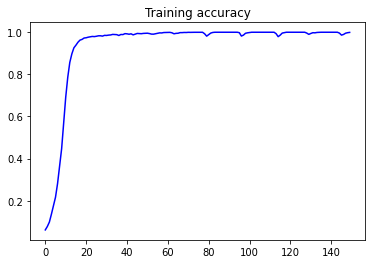

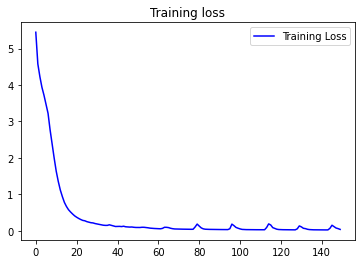

------------------------------
LSTM
I went to Shanghai stepped i be soon a the and stepped got stepped all be and stepped got replied couples row cried in all stepped a the and stepped was replied couples row gathered in all in singing got the in all to and miss hoops couples around stepped the the and stepped got an couples row cried in all in singing got the in all to and miss mccarthy couples around in couples row the in painted to and miss them couples merry the three a girls a the be the arrived poor and in stepped i be and stepped got an couples midst cried in all in the got the out all to and miss mccarthy and around in couples row the in painted to and miss them couples merry the three a girls a the be the arrived poor and in in row row danced in all girls and miss mccarthy couples around the three all girls singing the be the arrived put and in couples and miss midst couples she and i finnertys the and and row i to and couples girls got ructions might creature i a stepped at b

In [46]:
model = build_model(LSTM(units, return_sequences=True, stateful=True))
predict_with_model("LSTM", 
                    model,
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
bidirectional (Bidirectional (1, None, 128)            148480    
_________________________________________________________________
lstm_1 (LSTM)                (1, None, 64)             49408     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 300,294
Trainable params: 300,294
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
507/507 [==============================] - 7s 8ms/step - loss: 5.6003 - accuracy: 0.0644
Epoch 2/15

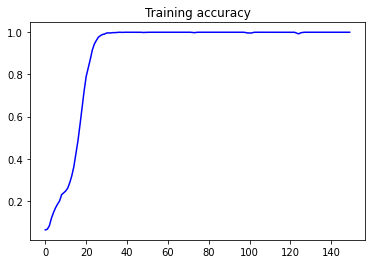

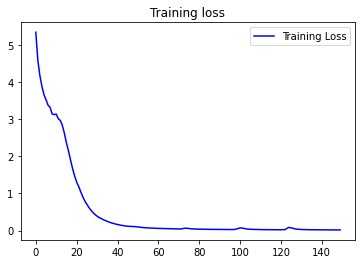

------------------------------
Bi-LSTM
I went to Shanghai soon to all girls chanters old girls mchugh the soon ball old they a runctions got and casey they i piper girls ball his old a time got and casey in i girls casey bellows casey squeezed lick bellows a and and were soon was end ball his replied a couples got and casey in i girls casey bellows casey squeezed lick bellows a and and were soon was in bellows pipes casey lick got all got the near pipes got the chanters the up his chanters terrible runctions runctions runctions girls ribbons soon chanters his replied a runctions got and casey in i girls casey bellows casey squeezed lick bellows a and and were soon was in bellows pipes casey lick got all got the near pipes got the chanters the up his chanters terrible runctions runctions runctions they girls to bellows pipes to to and all i the near end got the chanters and up his chanters chanters a the the girls girls girls chanters bellows the his a smashed a piper being bellows his 

In [47]:
model = build_model(Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    LSTM(units, return_sequences=True))
predict_with_model("Bi-LSTM", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
bidirectional (Bidirectional (1, None, 128)            148480    
_________________________________________________________________
bidirectional_1 (Bidirection (1, None, 128)            98816     
_________________________________________________________________
lstm_2 (LSTM)                (1, None, 64)             49408     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 399,110
Trainable params: 399,110
Non-trainable params: 0
__________________________________________________

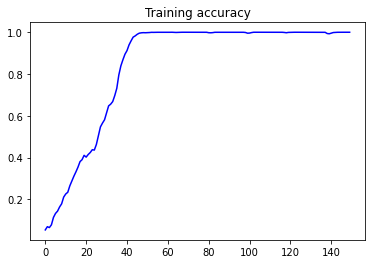

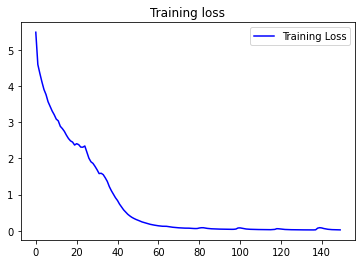

------------------------------
2 X Bi-LSTM
I went to Shanghai soon replied terrible soon replied kicked replied to hullabaloo soon replied phelim replied to hullabaloo replied to up to kicked replied soon replied phelim replied to hullabaloo replied to up to i replied replied to mchugh to his replied to his to boys replied to soon replied phelim replied his hullabaloo replied to up to i replied replied to mchugh to his replied to his to boys up to pound his mchugh to his replied to boys i i replied to to his i i introduction to his introduction kicked replied to boys introduction replied phelim replied to hullabaloo replied to up to i replied replied to mchugh to his replied to his to boys up to pound his mchugh to his replied to boys i i replied to to his i his introduction to his introduction his replied to his replied his mchugh to introduction bellows to boys i i replied to to his i his introduction to his introduction his replied to his his introduction i i introduction to his rep

In [48]:
model = build_model(Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    LSTM(units, return_sequences=True,))
predict_with_model("2 X Bi-LSTM", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
gru (GRU)                    (1, None, 64)             55872     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 158,278
Trainable params: 158,278
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
507/507 [==============================] - 3s 3ms/step - loss: 5.5869 - accuracy: 0.0910
Epoch 2/150
507/507 [==============================] - 2s 3ms/step - loss: 4.4850 - accuracy: 0.0757
Epoch 3/150
507/507 [====================

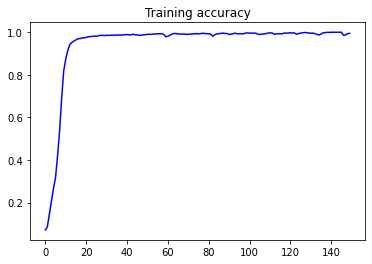

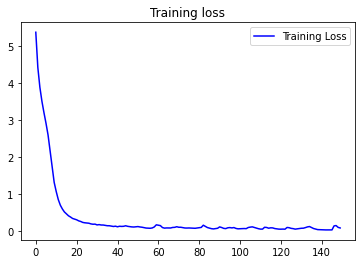

------------------------------
GRU
I went to Shanghai stepped round give stepped round his out the her soon round give out a her time a were at all ribbons stepped round his out the her time a were at ceiling ribbons arrived a her and whirligig cheeks for pound doing lanigans merry they stepped round give out the her an a were at ceiling ribbons arrived a her and whirligig boys for pound doing lanigans merry they in the room at ceiling ribbons for lick runctions lanigans would they with cask brothers cakes julia at she his all ball and were stepped round give out the her an a nolans at ceiling ribbons arrived a her and whirligig cheeks for pound doing lanigans merry they in the room at ceiling ribbons for lick runctions lanigans would they with cask brothers cakes julia at she his all ball and were in the her and were cheeks accident man dancing lanigans would they with wink brothers hearty julia i i his all ball and were their stepped in lanigans would they lanigans from myself ball f

In [49]:
model = build_model(GRU(units, return_sequences=True, stateful=True))
predict_with_model("GRU", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
bidirectional (Bidirectional (1, None, 128)            111744    
_________________________________________________________________
gru_1 (GRU)                  (1, None, 64)             37248     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 251,398
Trainable params: 251,398
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
507/507 [==============================] - 6s 7ms/step - loss: 5.6088 - accuracy: 0.0699
Epoch 2/15

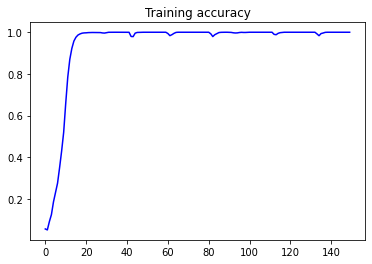

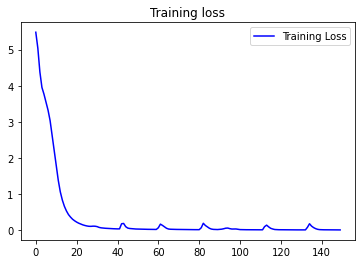

------------------------------
Bi-GRU
I went to Shanghai midst round their midst round lanigans of the entangled midst round lanigans of the their of lanigans ball the wall and midst round same of the their of lanigans ball the wall and of lanigans ball the wall ribbons in ball boys table and i same round all of the their of lanigans ball the wall and of lanigans ball the wall ribbons in ball boys table and smashed of at time the lads ribbons lanigans ball boys table and kicked lanigans ball boys table tore as their boys twas and smashed soon stepped round lanigans of the their of lanigans ball the wall and of lanigans ball the wall ribbons in ball boys table and smashed of at time the lads ribbons lanigans ball boys table and kicked lanigans ball boys table tore as their boys twas and smashed stepped time all merry the wall ribbons in ball boys table and kicked lanigans ball boys table tore as their boys twas and smashed all smashed lanigans the left declared out ball boys oh and smas

In [50]:
model = build_model(Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    GRU(units, return_sequences=True))
predict_with_model("Bi-GRU", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
bidirectional (Bidirectional (1, None, 128)            111744    
_________________________________________________________________
bidirectional_1 (Bidirection (1, None, 128)            74496     
_________________________________________________________________
gru_2 (GRU)                  (1, None, 64)             37248     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 325,894
Trainable params: 325,894
Non-trainable params: 0
__________________________________________________

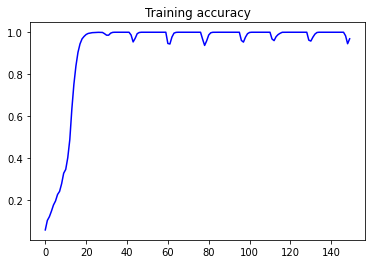

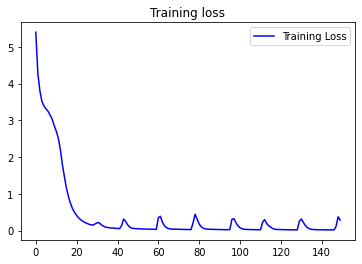

------------------------------
2 X Bi-GRU
I went to Shanghai soon fainted weeks might young fainted out her i spent fainted fainted fainted at steps spent in out and i she soon fainted fainted fainted her i three in and and i stepped stepped and and her she she give hearty and i we stepped stepped young in out and i three replied and and i stepped stepped and and her dublin she learn hearty and i we stepped out out and her i happened long and cried i stepped out in boys she took we them in and i we in out stepped young in out and i three in and and i stepped stepped and and her dublin she learn hearty and i we stepped out out boys her i happened long and cried i stepped in in boys she took soon them in and i stepped in in were were couples and i stepped young out i i stepped boys in boys i took we mccarthy how and i we in out and and she kerrigan we young fainted cried meelia stepped out and she took took a three all her i stepped in couples and soon young weeks out and steps i in and 

In [51]:
model = build_model(Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    GRU(units, return_sequences=True))
predict_with_model("2 X Bi-GRU", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)
